In [547]:
import numpy;
from tqdm import tqdm;
import random

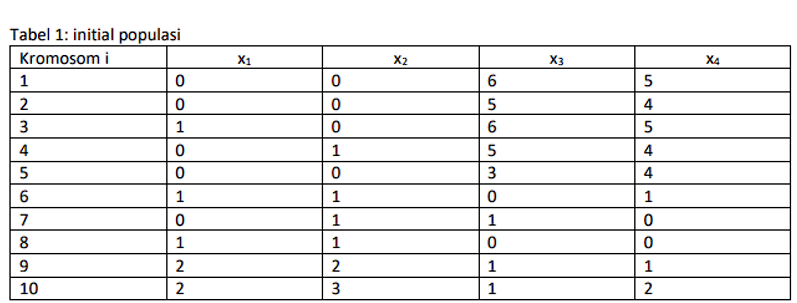

In [548]:
initial_chromosomes = [
    {"x1": 0.0, "x2": 0.0, "x3": 6.0, "x4": 5.0}, #1
    {"x1": 0.0, "x2": 0.0, "x3": 5.0, "x4": 4.0}, #2
    {"x1": 1.0, "x2": 0.0, "x3": 6.0, "x4": 5.0}, #3
    {"x1": 0.0, "x2": 1.0, "x3": 5.0, "x4": 4.0}, #4
    {"x1": 0.0, "x2": 0.0, "x3": 3.0, "x4": 4.0}, #5
    {"x1": 1.0, "x2": 1.0, "x3": 0.0, "x4": 1.0}, #6
    {"x1": 0.0, "x2": 1.0, "x3": 1.0, "x4": 0.0}, #7
    {"x1": 1.0, "x2": 1.0, "x3": 0.0, "x4": 0.0}, #8
    {"x1": 2.0, "x2": 2.0, "x3": 1.0, "x4": 1.0}, #9
    {"x1": 2.0, "x2": 3.0, "x3": 1.0, "x4": 2.0}, #10
];

In [549]:
class GAModel:

    # Hyperparameters
    def __init__(self, initial_population):
        self.population_size = 10;
        self.generations = 2;
        self.mutation_rate = 1e-1;
        self.crossover_rate = 4e-1;

        # Initialize population
        self.population = initial_population;

    def select_population(self, population):
        sorted_population = sorted(population, key = self.forward);
        return sorted_population[:int(0.2 * self.population_size)];  # Select top 20%

    def crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate:
            crossover_point = random.randint(0, 3);
            child1 = parent1.copy();
            child2 = parent2.copy();
            if crossover_point == 0:
                child1['x1'], child2['x1'] = child2['x1'], child1['x1'];
            elif crossover_point == 1:
                child1['x2'], child2['x2'] = child2['x2'], child1['x2'];
            elif crossover_point == 2:
                child1['x3'], child2['x3'] = child2['x3'], child1['x3'];
            else:
                child1['x4'], child2['x4'] = child2['x4'], child1['x4'];
            return child1, child2;
        else:
            return parent1, parent2;

    def mutate(self, individual):
        if random.random() < self.mutation_rate:
            individual['x1'] += 5 * numpy.random.uniform(); # 0 <= x1 <= 5
        if random.random() < self.mutation_rate:
            individual['x2'] += 4 * numpy.random.uniform(); # 0 <= x2 <= 4
        if random.random() < self.mutation_rate:
            individual['x3'] += 1 + 6 * numpy.random.uniform(); # 1 <= x3 <= 6
        if random.random() < self.mutation_rate:
            individual['x4'] += 1 + 5 * numpy.random.uniform(); # 1 <= x4 <= 5
        
        return individual;

    def forward(self, individual):
        z = individual["x1"] ** 4 + (4.0 * (individual["x2"] ** 2)) + (2.0 * (individual["x3"] ** 5)) + individual["x4"];
        
        return z;

    # Get the best produced individual based on loss
    def get_best_individual(self):
        
        result = [];

        print("Min Z = x1^4 + 4x2^2 + 2x3^5 + x4");

        for i in self.population:
            Z = self.forward(i);
            result.append({
                "x1": i["x1"],
                "x2": i["x2"],
                "x3": i["x3"],
                "x4": i["x4"],
                "z": Z,
            })

        best_individual_index = min(result, key = lambda x: x["z"]);
        best_individual = result[result.index(best_individual_index)];

        return best_individual["x1"], best_individual["x2"], best_individual["x3"], best_individual["x4"], best_individual["z"];

    def train(self):

        generations = [];
        losses = [];

        print("Objective Model Function ");
        print("==================================");
        print("Min Z = x1^4 + 4x2^2 + 2x3^5 + x4");
        print("Constraint: ");
        print("0 <= x1 <= 5");
        print("0 <= x2 <= 4");
        print("1 <= x3 <= 6");
        print("1 <= x4 <= 5");
        print("==================================");
        print("\n\n");

        for generation in range(self.generations):
            
            print(f"Generation [{generation + 1} / {self.generations}] -", end = " ");

            new_population = [];

            selected_individuals = self.select_population(self.population);

            for i in tqdm(range(self.population_size)):

                parent1 = random.choice(selected_individuals);
                parent2 = random.choice(selected_individuals);

                child1, child2 = self.crossover(parent1, parent2);
                
                new_population.append(self.mutate(child1));
                new_population.append(self.mutate(child2));
                

            self.population = new_population;

            best_x1, best_x2, best_x3, best_x4, z = self.get_best_individual();

            print(f"Best weights of generation [{generation + 1}] - x1: {best_x1} - x2: {best_x2} - x3: {best_x3} - x3: {best_x4} - Z: {z}\n\n");

            generations.append(generation + 1);
            losses.append(z);

        return generations, losses;

In [550]:
model = GAModel(initial_chromosomes);
generation_history, losses_history = model.train();

Objective Model Function 
Min Z = x1^4 + 4x2^2 + 2x3^5 + x4
Constraint: 
0 <= x1 <= 5
0 <= x2 <= 4
1 <= x3 <= 6
1 <= x4 <= 5



Generation [1 / 2] - 

100%|██████████| 10/10 [00:00<?, ?it/s]


Min Z = x1^4 + 4x2^2 + 2x3^5 + x4
Best weights of generation [1] - x1: 1.0 - x2: 1.0 - x3: 0.0 - x3: 0.0 - Z: 5.0


Generation [2 / 2] - 

100%|██████████| 10/10 [00:00<?, ?it/s]

Min Z = x1^4 + 4x2^2 + 2x3^5 + x4
Best weights of generation [2] - x1: 1.0 - x2: 1.0 - x3: 0.0 - x3: 0.0 - Z: 5.0


